In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./PM_DATA_2019.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17075 entries, 0 to 17074
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17075 non-null  int64  
 1   location       17075 non-null  object 
 2   NO2            16601 non-null  float64
 3   O3             16673 non-null  float64
 4   CO2            16585 non-null  float64
 5   SO2            16607 non-null  float64
 6   PM10           16488 non-null  float64
 7   PM2.5          16492 non-null  float64
 8   alert          17075 non-null  int64  
 9   windspeed      17075 non-null  float64
 10  winddirection  17075 non-null  int64  
 11  precipitation  17075 non-null  float64
 12  coalused       0 non-null      float64
dtypes: float64(9), int64(3), object(1)
memory usage: 1.7+ MB


In [4]:
df.drop(labels='coalused', axis=1, inplace=True)

In [5]:
'''결측치 확인'''
pd.isnull(df)
df.isnull().sum()

date               0
location           0
NO2              474
O3               402
CO2              490
SO2              468
PM10             587
PM2.5            583
alert              0
windspeed          0
winddirection      0
precipitation      0
dtype: int64

In [6]:
df.dropna(axis=0,how='any', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 0 to 17074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16173 non-null  int64  
 1   location       16173 non-null  object 
 2   NO2            16173 non-null  float64
 3   O3             16173 non-null  float64
 4   CO2            16173 non-null  float64
 5   SO2            16173 non-null  float64
 6   PM10           16173 non-null  float64
 7   PM2.5          16173 non-null  float64
 8   alert          16173 non-null  int64  
 9   windspeed      16173 non-null  float64
 10  winddirection  16173 non-null  int64  
 11  precipitation  16173 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.6+ MB


In [8]:
df_seoul = df.groupby(['date'], as_index=False).agg({'NO2':'mean','O3':'mean','CO2':'mean','SO2':'mean','PM10':'mean','PM2.5':'mean','alert':'mean','windspeed':'mean','winddirection':'mean','precipitation':'mean'})

In [9]:
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,alert,windspeed,winddirection,precipitation
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,0.0,2.1,290.0,0.0
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,0.0,1.7,270.0,0.0
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,0.0,1.4,290.0,0.0
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,0.0,1.2,20.0,0.0
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,1.0,2.2,290.0,0.0


In [10]:
df_seoul['PM10_class'] = -1
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,alert,windspeed,winddirection,precipitation,PM10_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,0.0,2.1,290.0,0.0,-1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,0.0,1.7,270.0,0.0,-1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,0.0,1.4,290.0,0.0,-1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,0.0,1.2,20.0,0.0,-1
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,1.0,2.2,290.0,0.0,-1


In [11]:
for (idx, row) in df_seoul.iterrows():
    pm10 = row[5]
    _class = -1
    if pm10 < 0:
        continue
    elif pm10 < 30:
        _class = 0
    elif pm10 < 80:
        _class = 1
    elif pm10 < 150:
        _class = 2
    else:
        _class = 3
    df_seoul.loc[idx, 'PM10_class'] = _class
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,alert,windspeed,winddirection,precipitation,PM10_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,0.0,2.1,290.0,0.0,1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,0.0,1.7,270.0,0.0,1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,0.0,1.4,290.0,0.0,1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,0.0,1.2,20.0,0.0,1
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,1.0,2.2,290.0,0.0,1


In [12]:
df_seoul['PM10_class'].unique()

array([1, 2, 3, 0], dtype=int64)

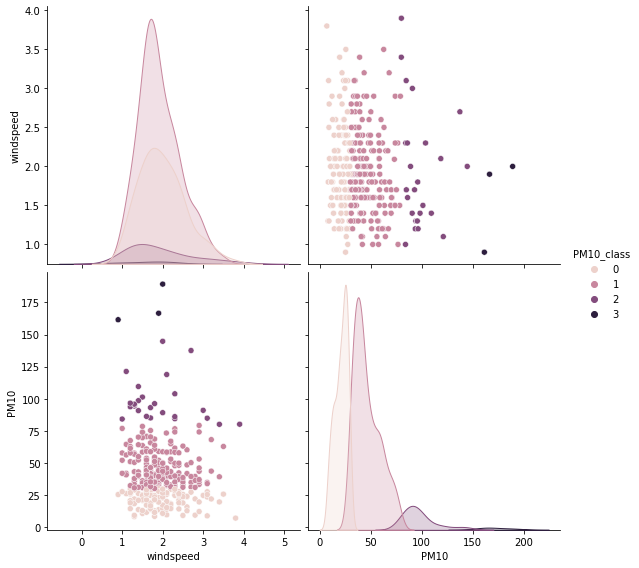

In [13]:
sns.pairplot(df_seoul, vars=['windspeed','PM10'],hue='PM10_class', height=4);


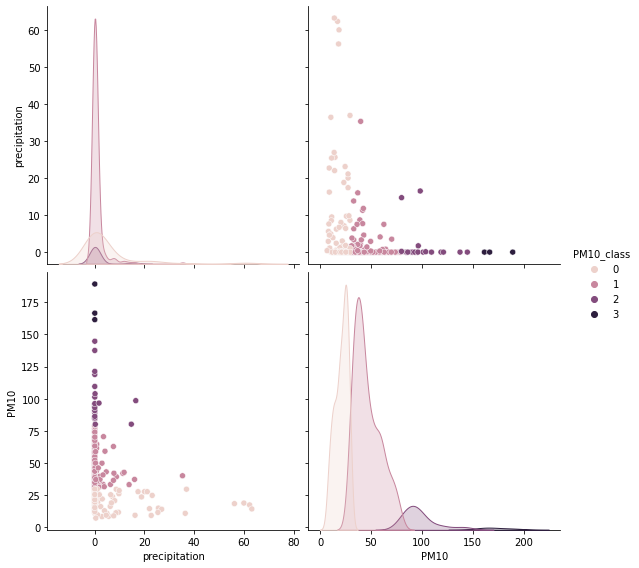

In [14]:
sns.pairplot(df_seoul, vars=['precipitation','PM10'],hue='PM10_class', height=4);


<AxesSubplot:xlabel='windspeed', ylabel='PM10'>

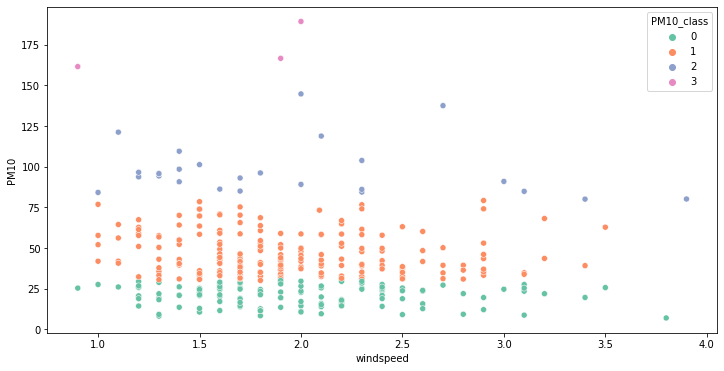

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='windspeed', y='PM10', data=df_seoul, hue='PM10_class', palette="Set2")

<AxesSubplot:xlabel='precipitation', ylabel='PM10'>

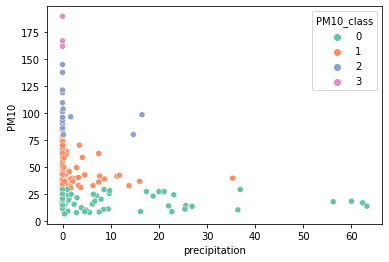

In [16]:
sns.scatterplot(x='precipitation', y='PM10', data=df_seoul, hue='PM10_class', palette="Set2")


In [17]:
from sklearn.tree import DecisionTreeClassifier

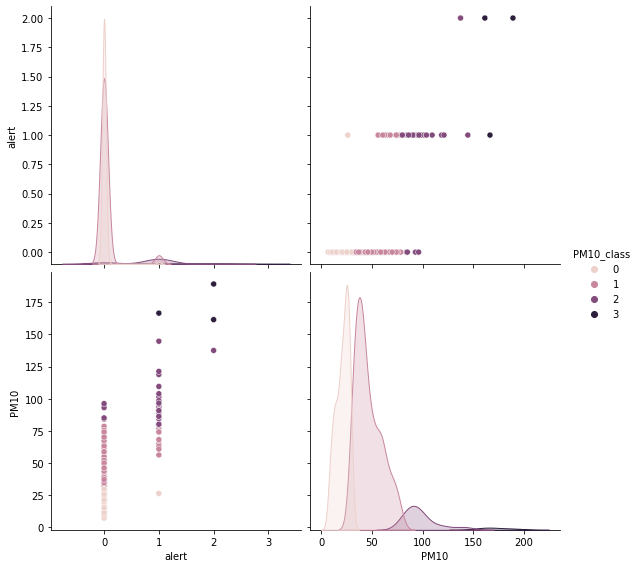

In [18]:
sns.pairplot(df_seoul, vars=['alert','PM10'],hue='PM10_class', height=4);


In [19]:
df_seoul['PM2.5_class'] = -1
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,alert,windspeed,winddirection,precipitation,PM10_class,PM2.5_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,0.0,2.1,290.0,0.0,1,-1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,0.0,1.7,270.0,0.0,1,-1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,0.0,1.4,290.0,0.0,1,-1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,0.0,1.2,20.0,0.0,1,-1
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,1.0,2.2,290.0,0.0,1,-1


In [20]:
for (idx, row) in df_seoul.iterrows():
    pm25 = row[6]
    _class = -1
    if pm25 < 0:
        continue
    elif pm25 < 15:
        _class = 0
    elif pm25 < 35:
        _class = 1
    elif pm25 < 75:
        _class = 2
    else:
        _class = 3
    df_seoul.loc[idx, 'PM2.5_class'] = _class
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,alert,windspeed,winddirection,precipitation,PM10_class,PM2.5_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,0.0,2.1,290.0,0.0,1,1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,0.0,1.7,270.0,0.0,1,1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,0.0,1.4,290.0,0.0,1,1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,0.0,1.2,20.0,0.0,1,2
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,1.0,2.2,290.0,0.0,1,2


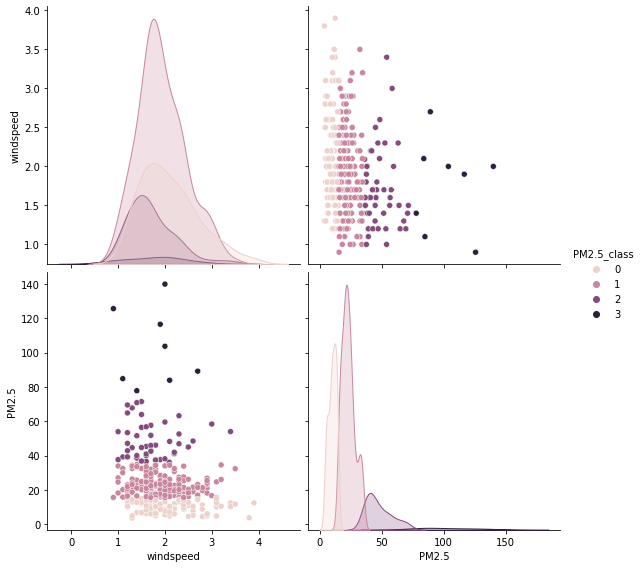

In [21]:
sns.pairplot(df_seoul, vars=['windspeed','PM2.5'],hue='PM2.5_class', height=4);


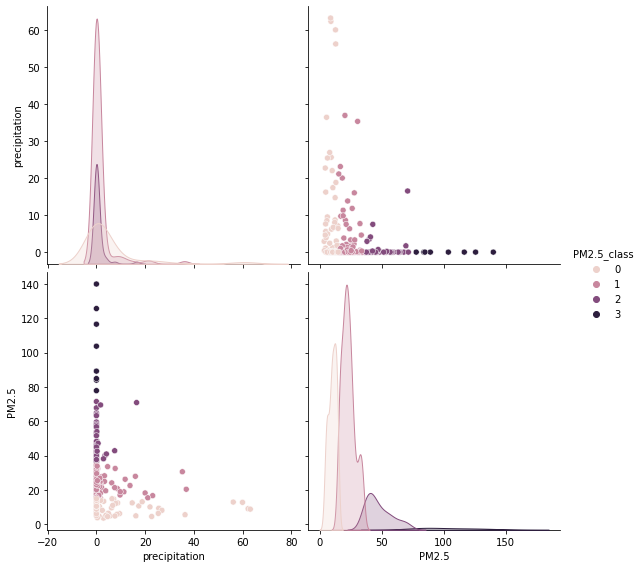

In [22]:
sns.pairplot(df_seoul, vars=['precipitation','PM2.5'],hue='PM2.5_class', height=4);


<AxesSubplot:xlabel='windspeed', ylabel='PM2.5'>

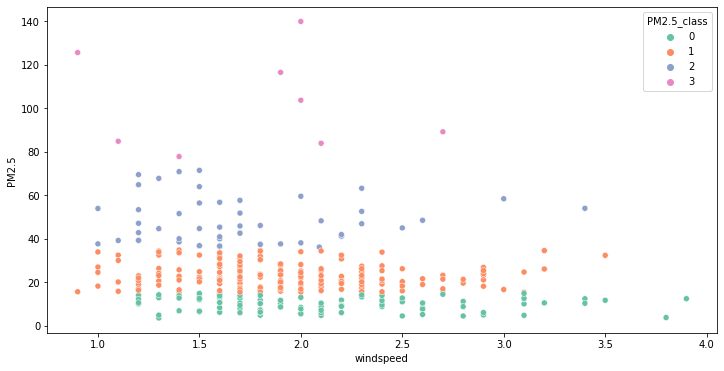

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='windspeed', y='PM2.5', data=df_seoul, hue='PM2.5_class', palette="Set2")

<AxesSubplot:xlabel='precipitation', ylabel='PM2.5'>

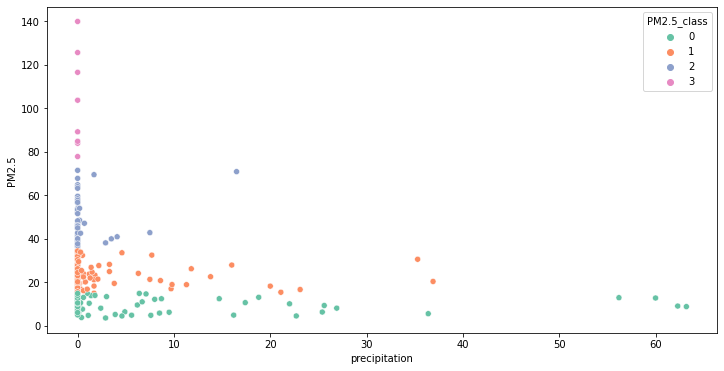

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='precipitation', y='PM2.5', data=df_seoul, hue='PM2.5_class', palette="Set2")

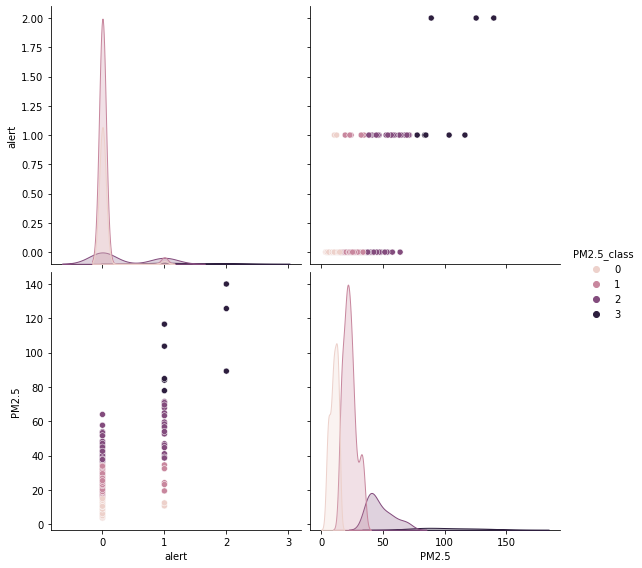

In [25]:
sns.pairplot(df_seoul, vars=['alert','PM2.5'],hue='PM2.5_class', height=4);

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [27]:
df_seoul.head()

,date,NO2,O3,CO2,SO2,PM10,PM2.5,alert,windspeed,winddirection,precipitation,PM10_class,PM2.5_class
0,20190101,0.032511,0.014578,0.744444,0.004356,38.933333,25.444444,0.0,2.1,290.0,0.0,1,1
1,20190102,0.037578,0.012178,0.751111,0.004844,33.933333,21.044444,0.0,1.7,270.0,0.0,1,1
2,20190103,0.045867,0.007422,0.822222,0.005111,39.466667,22.755556,0.0,1.4,290.0,0.0,1,1
3,20190104,0.061444,0.003956,1.153333,0.006178,58.866667,39.200000,0.0,1.2,20.0,0.0,1,2
4,20190105,0.031000,0.016844,0.704444,0.005178,64.822222,41.066667,1.0,2.2,290.0,0.0,1,2


In [28]:
X = df_seoul.drop(['PM10_class','PM10'], axis=1)
y = df_seoul['PM10_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [29]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.8873239436619719
Test ACC :  0.8472222222222222


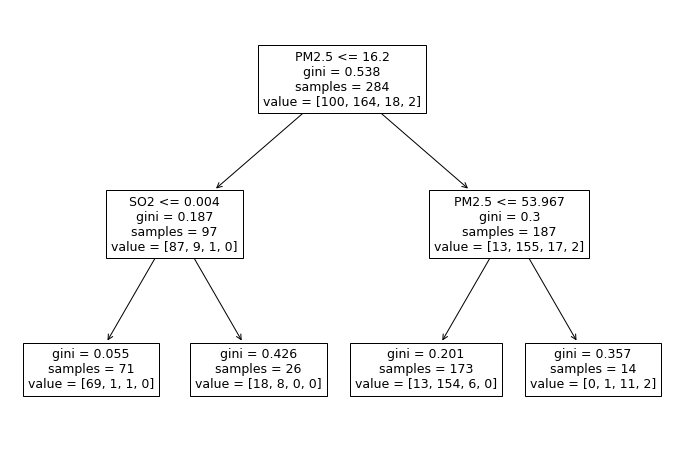

In [30]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

In [31]:
X = df_seoul.drop(['PM2.5_class','PM2.5'], axis=1)
y = df_seoul['PM2.5_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [32]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.8345070422535211
Test ACC :  0.9166666666666666


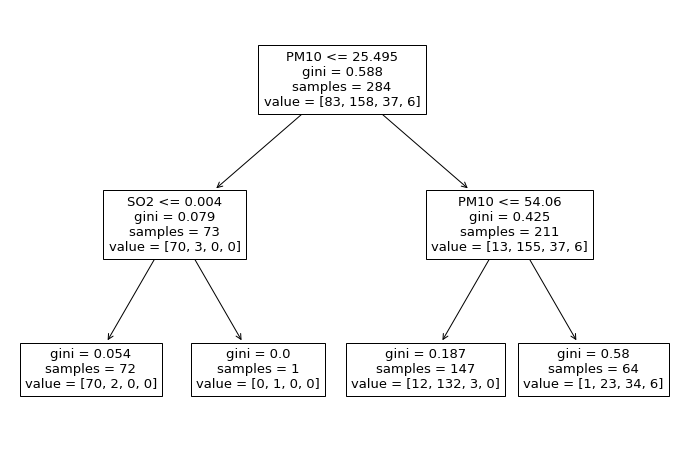

In [33]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

In [34]:
X = df_seoul.drop(['PM2.5_class','PM2.5','PM10','PM10_class'], axis=1)
y = df_seoul['PM2.5_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [35]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.778169014084507
Test ACC :  0.6666666666666666


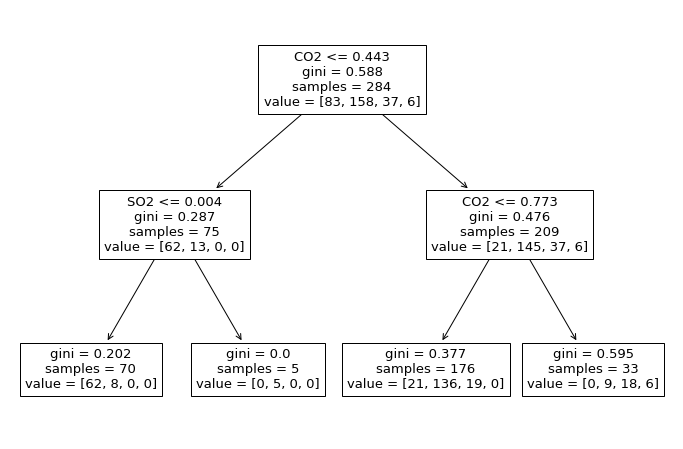

In [36]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

In [37]:
X = df_seoul.drop(['PM2.5_class','PM2.5','PM10','PM10_class','alert'], axis=1)
y = df_seoul['PM10_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [38]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.8169014084507042
Test ACC :  0.7222222222222222


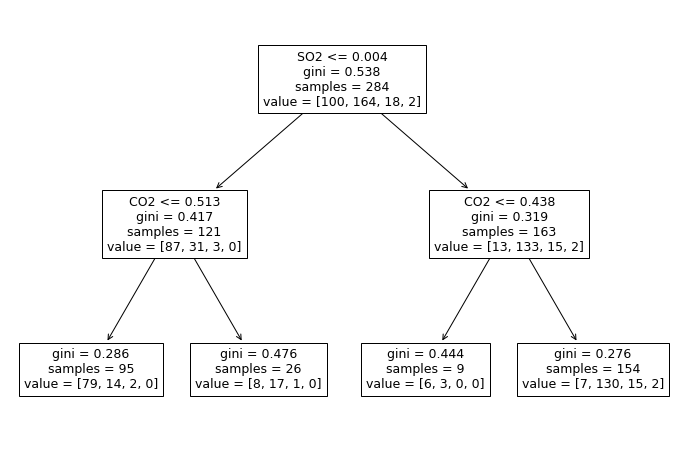

In [39]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

In [40]:
X = df_seoul.drop(['PM2.5_class','PM2.5','PM10','PM10_class','alert','SO2','CO2'], axis=1)
y = df_seoul['PM10_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [41]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.7640845070422535
Test ACC :  0.6944444444444444


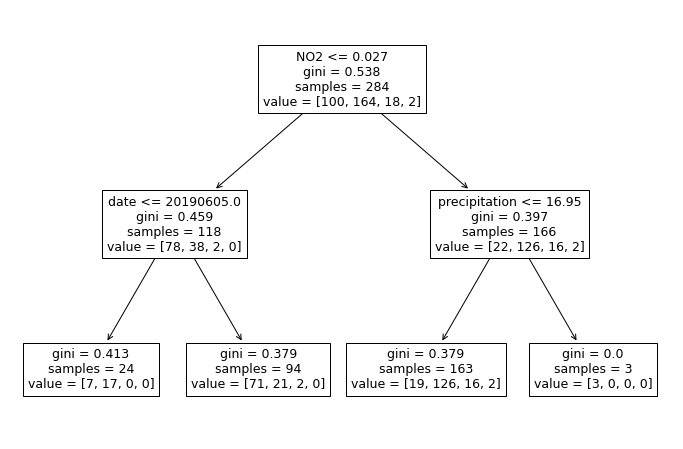

In [42]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

In [43]:
X = df_seoul.drop(['PM2.5_class','PM2.5','PM10','PM10_class','alert','SO2','CO2','NO2'], axis=1)
y = df_seoul['PM10_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

seoul_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
seoul_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [44]:
y_pred_tr = seoul_tree.predict(X_train)
y_pred_test = seoul_tree.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.7077464788732394
Test ACC :  0.6388888888888888


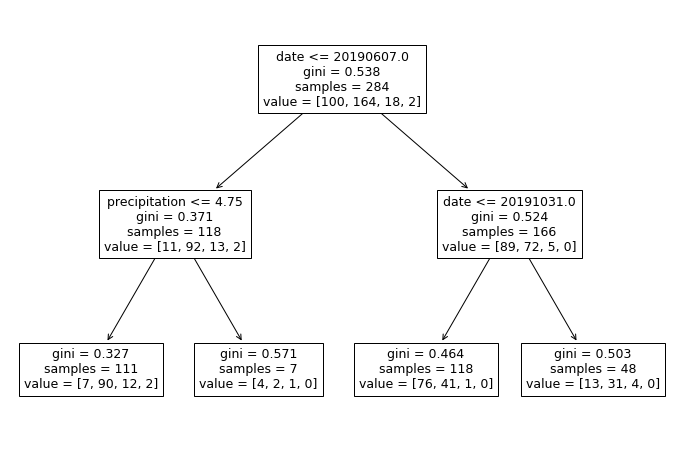

In [45]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,8))
tree.plot_tree(seoul_tree, feature_names=X.columns);

----

In [46]:
from sklearn.linear_model import LogisticRegression

X = df_seoul.drop(['PM2.5_class','PM2.5','PM10','PM10_class'], axis=1)
y = df_seoul['PM2.5_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [47]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train,y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [48]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.5563380281690141
Test ACC :  0.4722222222222222


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [51]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train ACC : ', accuracy_score(y_train, y_pred_tr))
print('Test ACC : ', accuracy_score(y_test, y_pred_test))

Train ACC :  0.8098591549295775
Test ACC :  0.6527777777777778


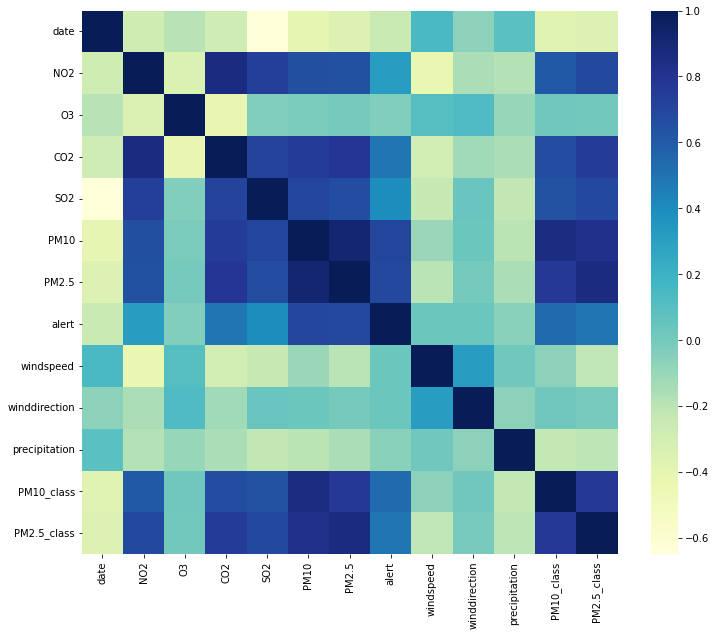

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(df_seoul.corr(), cmap='YlGnBu')
plt.show()

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [
    ('scaler', StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [54]:
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

In [55]:
coeff = list(pipe['clf'].coef_[0])
labels = list(X_train.columns)

In [56]:
coeff

[0.47736145228323323,
 -0.9044921627687434,
 -0.8919859794938276,
 -2.942307527195249,
 -1.3709025804069657,
 -0.08011891477296648,
 0.005578824271566355,
 -0.1827583400278863,
 0.028250508308078806]

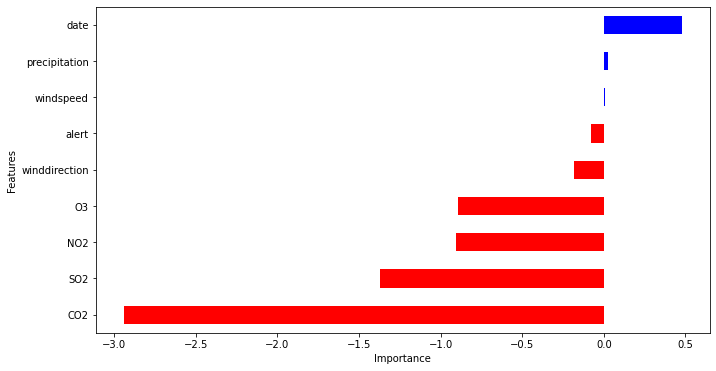

In [57]:
features = pd.DataFrame({'Features':labels, 'importance' : coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11,6), color=features['positive'].map({True:'blue',False:'red'}))

plt.xlabel('Importance')
plt.show()

In [78]:
X = df_seoul.drop(['PM2.5_class','PM2.5','alert'], axis=1)
y = df_seoul['PM2.5_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [80]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [81]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
17,1,0.841549,200,8
29,1,0.841549,200,10
2,1,0.841549,200,6
5,1,0.841549,200,6
26,1,0.841549,200,10


In [82]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [83]:
grid_cv.best_score_

0.8415492957746479

In [84]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=13)

In [85]:
pred = rf_clf_best.predict(X_test)
accuracy_score(y_test,pred)

0.8472222222222222

In [86]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top_cols = best_cols.sort_values(ascending=False)
top_cols

PM10             0.411197
PM10_class       0.179923
CO2              0.155332
SO2              0.095202
NO2              0.083822
date             0.026210
O3               0.019071
windspeed        0.018169
winddirection    0.006744
precipitation    0.004329
dtype: float64

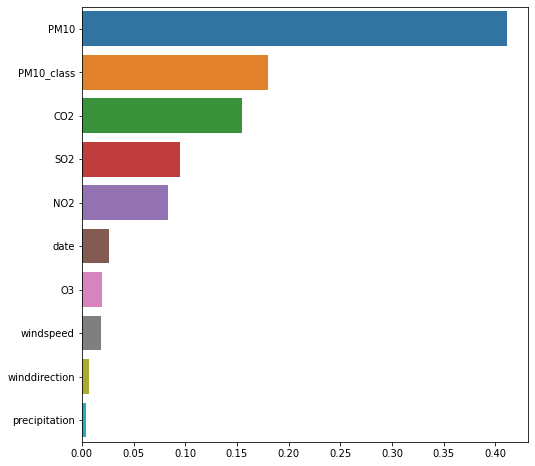

In [87]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top_cols, y=top_cols.index)
plt.show()